Valentino Febrian Kencono

2702265351

LJ01

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/MachineLearning/Titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/MachineLearning/Titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Pada code ini, berfungsi ntuk mencari data mana saja yang terdapat nilai null, lalu kita putuskan apakah harus di drop atau diisi

In [ ]:
print("Jumlah duplikasi: ", train_df.duplicated().sum())

Jumlah duplikasi:  0


Pada code ini berfungsi untuk mencari data yang duplicate, jika ada maka kita harus drop data tersebut.Jika tidak dihapus maka datanya bisa dihitung/diolah lebih dari sekali serta bisa mempengaruhi akurasi

In [ ]:
# nunjukin berapa row yang null
train_df[train_df.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Dari grafik diatas, untuk menentukan metode mana yang cocok untuk mengisi data yang hilang. Kita harus melihat dulu distribusi data agenya. Berdasarkan grafik diatas, distribusi data ini memiliki bentuk yang mirip dengan distribusi normal, karena ada puncak yang relatif tinggi di sekitar usia muda (sekitar 20-an) dan kemudian menurun secara bertahap di kedua sisi. Namun, distribusi ini cenderung agak miring ke kanan, dengan ekor yang lebih panjang pada sisi kanan, yang mengindikasikan bahwa distribusi ini mungkin lebih condong ke distribusi skewed (tergeser).

Grafik ini juga untuk menjawab pertanyaan nomer 1 yang meminta descriptive analysis and identify data distribution. Kenapa saya hanya menggunakan age? Karena menurut saya age adalah data yang paling bisa di deskripsikan dan juga di analisis distribusi datanya apakah terdistribusi normal atau tidak.

In [ ]:
train_df['Age'] = train_df['Age'].fillna(round(train_df['Age'].median()))
test_df['Age'] = test_df['Age'].fillna(round(test_df['Age'].median()))

Saya akhirnya memilih median, kenapa?
Median adalah pilihan yang baik untuk data skewed. Karena median adalah nilai tengah, ia tidak terpengaruh oleh pencilan atau distribusi yang terdistorsi (seperti skewed distribution). Jadi, meskipun distribusinya terbalik atau miring, median tetap memberikan representasi yang lebih tepat daripada mean.Median juga lebih tahan terhadap outlier dan distribusi yang tidak simetris.

dari grafik diatas didapatkan bahwa cabin tidak memiliki hubungan terhadap survival rate, karena seperti yang bisa dilihat, kita tidak menemukan pola bentuknya acak, maka kita bisa drop column cabin ini

---



In [ ]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

In [ ]:
train_df = train_df.drop(columns=['Cabin'])
test_df = test_df.drop(columns=['Cabin'])

Saya mengisi embarked dengan modusnya karena mencegah penyimpangan data dengan memasukkan kategori yang tidak umum.

In [ ]:
train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test_df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


In [ ]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


In [ ]:
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,270
mean,1100.500000,2.265550,NaN,NaN,29.599282,0.447368,0.392344,NaN,35.627188,NaN
std,120.810458,0.841838,NaN,NaN,12.703770,0.896760,0.981429,NaN,55.907576,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN
25%,996.250000,1.000000,NaN,NaN,23.000000,0.000000,0.000000,NaN,7.895800,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN


In [ ]:
train_df = train_df.drop(columns=['PassengerId', 'Name', 'Ticket'])
test_df = test_df.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
train_df['Age_Group'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_survival_rate = train_df.groupby('Age_Group')['Survived'].mean()

train_df['Age_Group'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels)

train_df = pd.get_dummies(train_df, columns=['Pclass', 'Embarked', 'Fare', 'Age_Group'])

categorical_features = train_df.select_dtypes(include=['object']).columns
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    train_df[feature] = le.fit_transform(train_df[feature])
    label_encoders[feature] = le

train_df

<ipython-input-17-ea742a71f997>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival_rate = train_df.groupby('Age_Group')['Survived'].mean()


,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,Fare_263.0,Fare_512.3292,Age_Group_0-10,Age_Group_11-20,Age_Group_21-30,Age_Group_31-40,Age_Group_41-50,Age_Group_51-60,Age_Group_61-70,Age_Group_71-80
0,0,1,22.0,1,0,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,1,0,38.0,1,0,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,1,0,26.0,0,0,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1,0,35.0,1,0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,1,35.0,0,0,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
887,1,0,19.0,0,0,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
888,0,0,28.0,1,2,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
889,1,1,26.0,0,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc, f1_score
from sklearn.preprocessing import StandardScaler


X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
# Model Evaluation
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Baseline Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Baseline Model Evaluation Metrics:
Accuracy: 0.77
Precision: 0.72
Recall: 0.67
F1 Score: 0.69
ROC-AUC Score: 0.79


Accuracy (0.77): Memprediksi penumpang yang survived dengan benar dengan nilai 77%.

Precision (0.72): Dari semua penumpang yang diprediksi selamat, 72% benar-benar selamat (false positive)

Recall (0.67): Model ini mengidentifikasi 67% dari penumpang yang selamat, artinya model melewatkan beberapa penumpang yang selamat (false negative).

F1 Score (0.69): Menyeimbangkan precision dan recall, skor F1nya menghasilkan 0.69 menunjukkan model masih perlu diimprove.

ROC-AUC Score (0.79): Untuk membedakan dengan benar antara penumpang yang selamat dan tidak selamat.

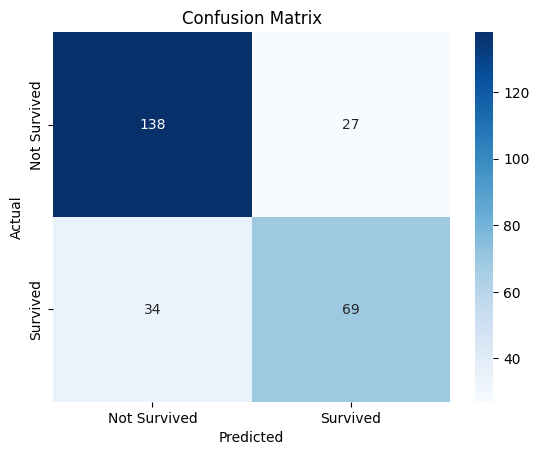

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Dari confussion matrix diatas di dapat jika true positive dan true negative yang didapat melebihi dari false positive dan false negative. Namun jika dihitung dengan evaluation metrics hasilnya sudah lumayan tapi masih belum bagus.



In [ ]:
# Cross Validation
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Accuracy Scores: [0.736      0.808      0.848      0.78225806 0.80645161]
Mean Cross-Validation Accuracy: 0.80


So far dari cross validation yang dihasilkan, hasilnya cukup konsisten dan rata-rata nilainya juga lumayan.

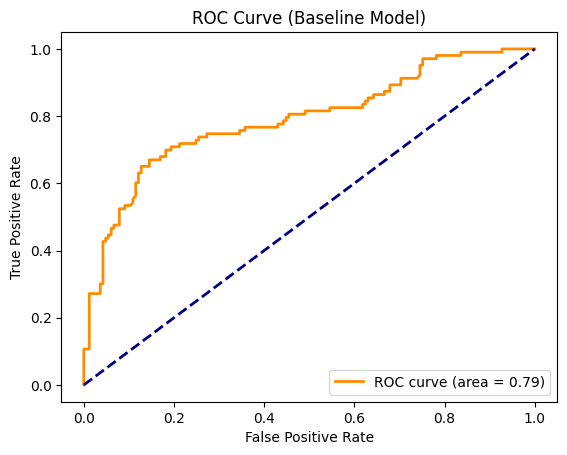

In [ ]:
# Visualize the ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Baseline Model)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.83


In [ ]:
best_log_reg = grid_search.best_estimator_
y_pred_tuned = best_log_reg.predict(X_test_scaled)
y_pred_proba_tuned = best_log_reg.predict_proba(X_test_scaled)[:, 1]

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print("Tuned Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_tuned:.2f}")
print(f"Precision: {precision_tuned:.2f}")
print(f"Recall: {recall_tuned:.2f}")
print(f"F1 Score: {f1_tuned:.2f}")
print(f"ROC-AUC Score: {roc_auc_tuned:.2f}")

Tuned Model Evaluation Metrics:
Accuracy: 0.80
Precision: 0.78
Recall: 0.68
F1 Score: 0.73
ROC-AUC Score: 0.82


In [ ]:
X_full_scaled = scaler.fit_transform(X)
final_model = LogisticRegression(**grid_search.best_params_, max_iter=1000, random_state=42)
final_model.fit(X_full_scaled, y)

LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived'])
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

Not Survived       0.80      0.84      0.82       165
    Survived       0.72      0.67      0.69       103

    accuracy                           0.77       268
   macro avg       0.76      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268

